In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.read_csv("kc_house_data.csv")
raw_data.head()

,sqft,floors,bedrooms,bathrooms,price
0,5650,1.0,3,1.00,221900.0
1,7242,2.0,3,2.25,538000.0
2,10000,1.0,2,1.00,180000.0
3,5000,1.0,4,3.00,604000.0
4,8080,1.0,3,2.00,510000.0


In [3]:
data = np.array(raw_data)

In [4]:
no_of_examples = data.shape[0]
no_of_features = data.shape[1]-1

In [5]:
no_train = int(0.8*no_of_examples)
no_train

17290

In [6]:
X_train = data[:no_train,:-1]
y_train = data[:no_train,-1]
X_test = data[no_train:,:-1]
y_test = data[no_train:,-1]

In [7]:
X_mean = np.mean(X_train,axis=0)
X_std = np.std(X_train,axis=0)
X_train = (X_train - X_mean)/X_std
X_test = (X_test-X_mean)/X_std

In [8]:
y_mean = np.mean(y_train,axis=0)
y_std = np.std(y_train,axis=0)
y_train = (y_train - y_mean)/y_std

In [9]:
class Linear_model:
    def __init__(self,m,X,y):
        #self.W = np.zeros((m,1))
        self.W = np.random.rand(m,1)
        self.b = 0
        self.X = X
        self.N = X.shape[0]
        self.y = y.reshape((self.N,1))
        
    
    def train_abs_err(self,lr=0.1):
        pred = (self.X).dot(self.W) + self.b
        err = pred - self.y
        abs_err = np.absolute(err)
        loss = np.sum(abs_err)/self.N
        
        grad = np.zeros(self.W.shape)
        idx = 0
        gradb = 0
        
        for r in err:
            if r[0]>=0:
                grad += self.X[idx,:].reshape((1,no_of_features)).T
                gradb += 1
                
            else:
                grad -= self.X[idx,:].reshape((1,no_of_features)).T
                gradb -= 1
            idx+=1
            
        grad /= self.N
        gradb /= self.N
        
        self.W -= lr*grad
        self.b -= lr*gradb
        
        return loss
    
    def train_squared_err(self, lr = 0.1, reg = 0):
        pred = (self.X).dot(self.W) + self.b
        err = pred - self.y
        err2 = err**2
        loss = np.sum(err2)/self.N
        loss += reg*np.sum(self.W**2)
        
        grad = (self.X).T.dot(err)
        grad *= 2/self.N
        
        grad += 2*reg*self.W
        
        self.W -= lr*grad
        self.b -= lr*np.sum(err)*2/self.N
        
        return loss
    
    def train_cub_err(self,lr=0.1):
        pred = self.X.dot(self.W) + self.b
        err = pred - self.y
        err2 = err**2
        err3 = err**3
        
        cub_err = np.absolute(err3)
        loss = np.sum(cub_err)/self.N
        
        grad = np.zeros(self.W.shape)
        idx = 0
        gradb = 0
        
        for r in err3:
            if r[0]>=0:
                grad += self.X[idx,:].reshape((1,no_of_features)).T*err2[idx]
                gradb += err2[idx]
            else:
                grad -= self.X[idx,:].reshape((1,no_of_features)).T*err2[idx]
                gradb -= err2[idx]
                
        grad /= self.N
        gradb /= self.N
        
        self.W -= lr*grad
        self.b -= lr*gradb
        
        return loss
    
    def evaluate(self,X_test):
        return (X_test).dot(self.W) + self.b      
        
        
        

In [10]:
'''
no_of_epochs = 500
model = Linear_model(no_of_features, X_train,y_train)
RMSE_plot = []
for i in range(no_of_epochs):
    loss = model.train_cub_err(lr=0.005)
    print(loss)
    RMSE_plot.append(loss)
'''

'\nno_of_epochs = 500\nmodel = Linear_model(no_of_features, X_train,y_train)\nRMSE_plot = []\nfor i in range(no_of_epochs):\n    loss = model.train_cub_err(lr=0.005)\n    print(loss)\n    RMSE_plot.append(loss)\n'

In [11]:
no_of_epochs = 300
model = Linear_model(no_of_features, X_train,y_train)
abs_plot = []
for i in range(no_of_epochs):
    loss = model.train_abs_err(lr=0.05)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print(test_loss)
    abs_plot.append(test_loss)

685522.477728
664820.224561
644639.536394
625070.033943
606236.155528
588185.284734
571009.465652
554758.603059
539577.304846
525470.106756
512480.974205
500707.65802
490058.007926
480381.111601
471581.843541
463649.591568
456571.060409
450170.825527
444418.912858
439303.655061
434700.257677
430641.333631
426993.41391
423746.981733
420825.091168
418203.071119
415850.411931
413735.540372
411828.630581
410086.453215
408512.865609
407090.451837
405802.011806
404641.821675
403590.605418
402666.615732
401829.79101
401093.349757
400423.140793
399826.196187
399283.360917
398787.159519
398342.956956
397945.531959
397596.584436
397297.290247
397023.868621
396774.607329
396549.845932
396345.373237
396146.357318
395973.619386
395824.863541
395689.031153
395567.988334
395473.494018
395384.31181
395301.394196
395224.606359
395157.469537
395102.134834
395064.202428
395029.767843
395018.015924
395007.617866
394998.920295
394992.282689
394998.998463
395008.744955
395027.364719
395045.042536
395062.945

In [12]:
no_of_epochs = 300
model = Linear_model(no_of_features, X_train,y_train)
sqr_plot = []
for i in range(no_of_epochs):
    loss = model.train_squared_err(lr=0.05)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print(test_loss)
    sqr_plot.append(test_loss)

558698.380252
533763.044149
513334.023759
496540.614086
482690.089452
471230.868002
461722.779023
453813.393662
447219.379305
441711.914481
437105.323266
433248.226942
430016.645642
427308.602767
425039.885487
423140.695576
421552.988125
420228.344315
419126.261225
418212.769453
417459.310085
416841.818214
416339.971969
415936.574924
415617.046553
415369.000615
415181.895384
415046.742792
414955.866039
414902.69718
414881.607771
414887.766901
414917.021989
414965.798492
415031.015391
415110.013845
415200.496844
415300.478085
415408.238577
415522.289734
415641.341937
415764.277692
415890.128677
416018.056069
416147.333651
416277.333282
416407.512365
416537.403024
416666.602739
416794.766215
416921.598326
417046.847965
417170.30268
417291.783991
417411.143279
417528.258193
417643.029484
417755.378221
417865.243343
417972.57949
418077.355089
418179.550667
418279.157345
418376.175509
418470.613635
418562.48723
418651.817908
418738.632559
418822.962606
418904.843355
418984.313403
419061.414

In [13]:
no_of_epochs = 300
model = Linear_model(no_of_features, X_train,y_train)
cub_plot = []
for i in range(no_of_epochs):
    loss = model.train_cub_err(lr=0.05)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print(test_loss)
    cub_plot.append(test_loss)

703746.30568
703028.636327
702349.487512
701704.984756
701086.11777
700502.740541
699938.205493
699384.28746
698863.826193
698363.278355
697884.700367
697420.101107
696976.616793
696543.963057
696124.369443
695715.159473
695308.931109
694908.038077
694526.607491
694154.854525
693801.955206
693460.602176
693130.599756
692807.174071
692494.78483
692202.323075
691920.457277
691640.062072
691372.28102
691112.49441
690860.594934
690614.280475
690380.047439
690157.741514
689940.707279
689726.724287
689520.065424
689320.648871
689130.531868
688941.103889
688760.842703
688587.542602
688425.348764
688265.759808
688112.940253
687964.744757
687816.973231
687673.77404
687533.041265
687394.75628
687263.017183
687131.615655
687000.55043
686869.820246
686743.498261
686627.649366
686514.090929
686402.808462
686289.750433
686178.957838
686070.416615
685968.124104
685872.04252
685776.143233
685684.413625
685598.821546
685515.361559
685436.007083
685358.758158
685281.627748
685204.615585
685131.664427
68

In [14]:
import matplotlib.pyplot as plt

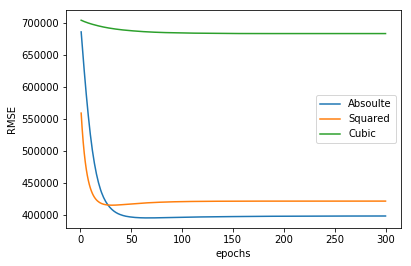

In [15]:
%matplotlib inline
abs_, = plt.plot(1+np.array(range(no_of_epochs)),abs_plot)
sqr_, = plt.plot(1+np.array(range(no_of_epochs)),sqr_plot)
cub_, = plt.plot(1+np.array(range(no_of_epochs)),cub_plot)
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.legend([abs_, sqr_, cub_],["Absoulte","Squared","Cubic"])